Algoritmos


In [13]:
def bucketsort(arr: list[int]):
    if len(arr) == 0:
        return arr
    min_value = min(arr)
    max_value = max(arr)
    diff = abs(max_value - min_value)
    if diff == 0:
        return arr
    bucket = [0] * (diff + 1)
    for element in arr:
        index = element - min_value
        bucket[index] += 1
    arr = []
    for i in range(len(bucket)):
        item = bucket[i]
        for _ in range(item):
            arr.append(i + min_value)
    return arr


def haore_partition(items: list[int], start: int, pivot_index: int):

    pivot = items[pivot_index]
    right = pivot_index - 1
    left = start

    while left <= right:
        while left <= right and items[left] < pivot:
            left += 1
        while left <= right and items[right] > pivot:
            right -= 1
        if left <= right:
            items[left], items[right] = items[right], items[left]
            left += 1
            right -= 1
    items[left], items[pivot_index] = items[pivot_index], items[left]
    return left  # return the new pivot index


def quick_haore(items: list[int], start: int, pivot_index: int):

    if start < pivot_index:
        split_index = haore_partition(items, start, pivot_index)

        quick_haore(items, start, split_index - 1)
        quick_haore(items, split_index + 1, pivot_index)


def quicksort(arr):
    if len(arr) == 0:
        return arr
    quick_haore(arr, 0, len(arr) - 1)
    return arr

Coleta dados


In [14]:
import time
from numpy import random


# scope of the randomness
DOMAIN = 999

# defines the number of times each algorithm will be processed to find the average time
num_rounds = 999

alg_results = dict()


# calculates the executions average time
def avgTime(func, size, debug=False):
    t = 0
    for i in range(num_rounds):
        random.seed(size + i)
        # create a list with random numbers
        dataList = list(random.randint(DOMAIN, size=size))
        L = dataList.copy()
        start = time.time()
        L = func(L)
        end = time.time()
        t += end - start

        if debug:
            assert L == sorted(L), "Non sorted"

    return t / num_rounds


# defines the algorithms to be processed
algorithms = [
    bucketsort,
    quicksort,
]

# sizes
sizes = [i for i in range(10000, 50001, 10000)]

mapSizeToTime = dict()
for i in range(len(sizes)):
    print(f"Starting collect {i+1}")

    # map list size to algorithm average time
    for algorithm in algorithms:
        print("  > ", algorithm.__name__)
        mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avgTime(
            algorithm, sizes[i], True
        )
    print("")

print("Finish data collection")

Starting collect 1
  >  bucketsort
  >  quicksort

Starting collect 2
  >  bucketsort
  >  quicksort

Starting collect 3
  >  bucketsort
  >  quicksort

Starting collect 4
  >  bucketsort
  >  quicksort

Starting collect 5
  >  bucketsort
  >  quicksort

Finish data collection


Formata dados


In [15]:
import pandas as pd

df = pd.DataFrame.from_dict(mapSizeToTime, orient="index", columns=["Time"])
df["Algorithm"] = [i.split("##")[0] for i in df.index]
df["Size"] = [int(i.split("##")[1]) for i in df.index]
df

,Time,Algorithm,Size
bucketsort##10000,0.001785,bucketsort,10000
quicksort##10000,0.009893,quicksort,10000
bucketsort##20000,0.003433,bucketsort,20000
quicksort##20000,0.021137,quicksort,20000
bucketsort##30000,0.005164,bucketsort,30000
quicksort##30000,0.032993,quicksort,30000
bucketsort##40000,0.007341,bucketsort,40000
quicksort##40000,0.047297,quicksort,40000
bucketsort##50000,0.009062,bucketsort,50000
quicksort##50000,0.061479,quicksort,50000


Gráfico


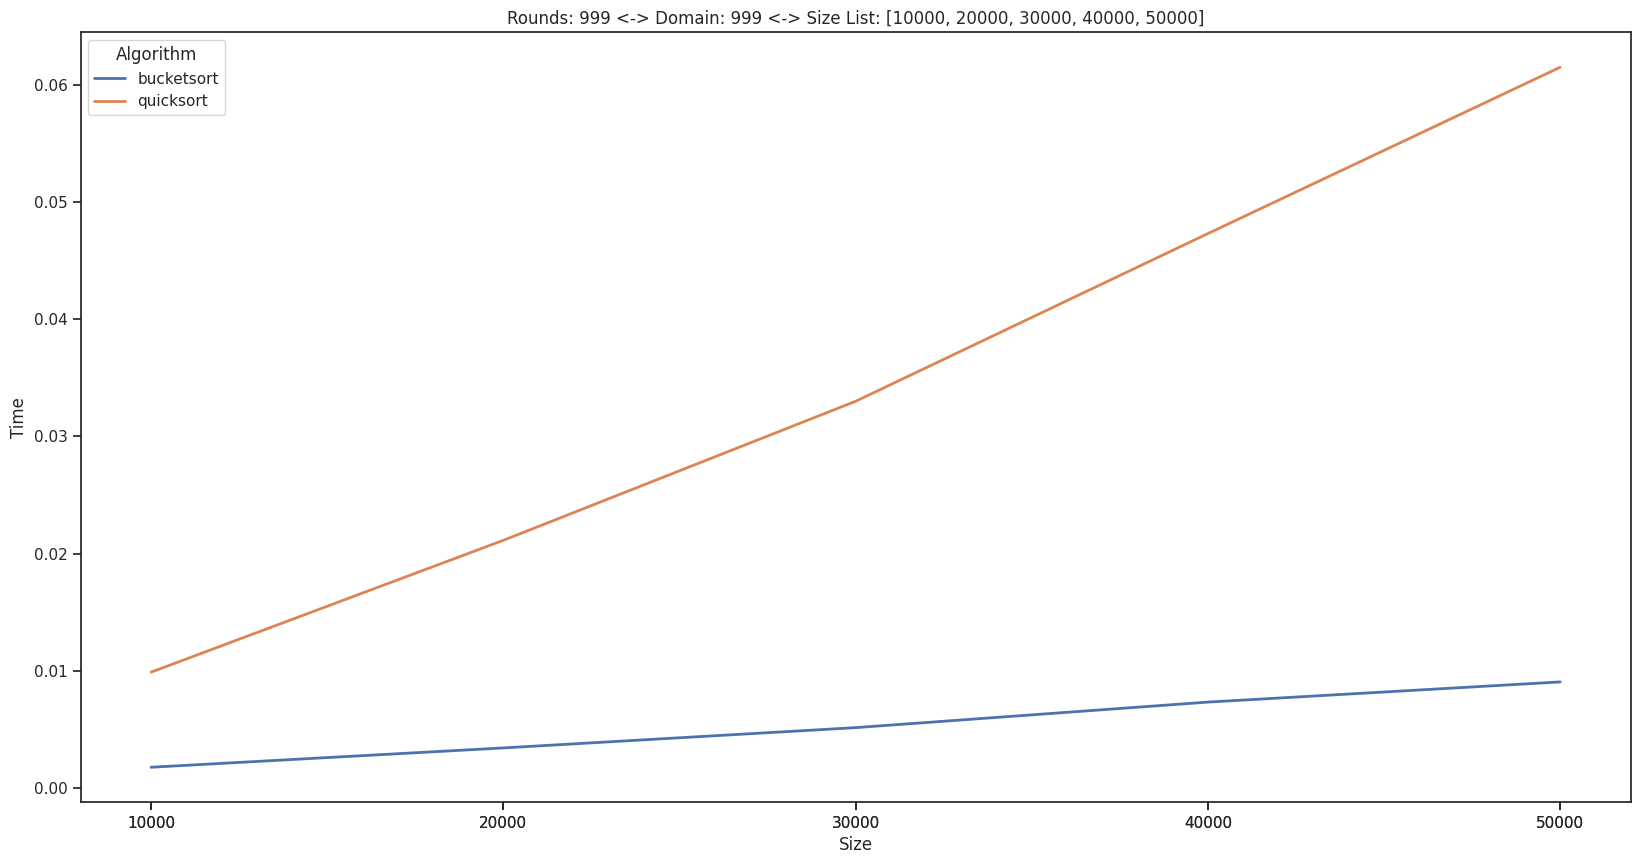

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Defines font size and line width
sns.set_theme(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

# Defines plot size
plt.rcParams["figure.figsize"] = [20, 10]

fig = plt.figure()
chart = sns.lineplot(x="Size", y="Time", hue="Algorithm", data=df)
chart.set_title(f"Rounds: {num_rounds} <-> Domain: {DOMAIN} <-> Size List: {sizes}")

chart.set(xticks=[i for i in df.Size])
plt.savefig("results.png", bbox_inches="tight")